# Análisis de Datos de Fraude en Seguros de Auto

## 2. Procesamiento de los Datos

### 2.1 Carga de Librerías

In [1]:
# Cargamos las librerías a utilizar

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split, KFold, cross_val_score
#from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PowerTransformer
#from sklearn.compose import make_column_transformer
#from sklearn.pipeline import make_pipeline
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import cohen_kappa_score, accuracy_score, roc_auc_score, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# Para mostrar todas las columnas

pd.set_option('display.max_columns', None)

In [3]:
# Para mostar las cifras en formato float

pd.options.display.float_format = '{:.2f}'.format

### 2.2 Carga de Datos

In [4]:
# Asignamos el dataframe

car_fraud = pd.read_csv('.\..\data\Dataset.csv')

In [5]:
# Mostramos un encabezado de los datos

car_fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.00,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.00,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.07
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.00,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.00,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.46
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.00,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.00,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.94
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.00,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.00,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.15
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.00,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.00,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.37


### 2.3 Limpieza de Datos

In [6]:
# Mostramos la suma de valores nulos

car_fraud.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [7]:
# Imputamos los valores nulos
# Esto también se puede realizar con pipeline SimpleImputer o KNNImputer

median_age = car_fraud['Age'].median()
car_fraud['Age'] = car_fraud['Age'].fillna(median_age)
median_DR = car_fraud['DriverRating'].median()
car_fraud['DriverRating'] = car_fraud['DriverRating'].fillna(median_DR)
car_fraud.isnull().any()

Month                   False
WeekOfMonth             False
DayOfWeek               False
Make                    False
AccidentArea            False
DayOfWeekClaimed        False
MonthClaimed            False
WeekOfMonthClaimed      False
Sex                     False
MaritalStatus           False
Age                     False
Fault                   False
PolicyType              False
VehicleCategory         False
VehiclePrice            False
FraudFound_P            False
PolicyNumber            False
RepNumber               False
Deductible              False
DriverRating            False
Days_Policy_Accident    False
Days_Policy_Claim       False
PastNumberOfClaims      False
AgeOfVehicle            False
AgeOfPolicyHolder       False
PoliceReportFiled       False
WitnessPresent          False
AgentType               False
NumberOfSuppliments     False
AddressChange_Claim     False
NumberOfCars            False
Year                    False
BasePolicy              False
ClaimSize 

In [8]:
# Reemplazamos los valores iguales a 0

car_fraud['DayOfWeekClaimed'] = car_fraud['DayOfWeekClaimed'].replace('0', 'Monday')
car_fraud['MonthClaimed'] = car_fraud['MonthClaimed'].replace('0', 'Jan')

car_fraud['Age'] = car_fraud['Age'].replace(0, median_age)

mean_ClaimSize = car_fraud['ClaimSize'].mean()
car_fraud['ClaimSize'] = car_fraud['ClaimSize'].replace(0, mean_ClaimSize)

print(car_fraud.groupby('DayOfWeekClaimed').size())
print(car_fraud.groupby('MonthClaimed').size())
print(car_fraud.groupby('Age').size())
print(car_fraud.groupby('ClaimSize').size())

DayOfWeekClaimed
Friday       1842
Monday       2812
Saturday       94
Sunday         40
Thursday     2000
Tuesday      2545
Wednesday    2232
dtype: int64
MonthClaimed
Apr     970
Aug     846
Dec     879
Feb     955
Jan    1085
Jul     908
Jun     967
Mar    1005
May    1038
Nov     973
Oct     995
Sep     944
dtype: int64
Age
16.00     8
17.00     5
18.00    34
19.00    24
20.00    15
         ..
76.00    32
77.00    20
78.00    26
79.00    12
80.00    25
Length: 65, dtype: int64
ClaimSize
504.58       4
512.67       1
532.51       1
538.14       5
542.63       2
            ..
100701.44    1
103375.05    1
103420.79    1
104194.70    1
141394.16    1
Length: 3332, dtype: int64


In [9]:
# Validamos el número de filas y columnas

car_fraud.shape

(11565, 34)

### 2.4 División de los Datos

In [10]:
# Dividimos los datos en X y y

X = car_fraud.drop(['FraudFound_P', 'PolicyNumber'], axis = 1)
y = car_fraud['FraudFound_P']

In [11]:
# Validamos el número de filas y columnas

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (11565, 32)
y: (11565,)


In [12]:
# Dividimos los datos en entrenamiento y prueba
#,stratify=y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [13]:
# Validamos el número de filas y columnas

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (9252, 32)
X_test: (2313, 32)
y_train: (9252,)
y_test: (2313,)


### 2.5 Codificación de Datos Categóricos

In [14]:
# Ordenamos las variables categóricas ordinales y nominales

Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
DayOfWeek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Make = ['Accura', 'BMW', 'Chevrolet', 'Dodge', 'Ferrari', 'Ford', 'Honda', 'Jaguar', 'Lexus', 'Mazda', 'Mecedes', 'Mercury', 'Nisson', 'Pontiac', 'Porche', 'Saab', 'Saturn', 'Toyota', 'VW']
AccidentArea = ['Rural', 'Urban']
DayOfWeekClaimed = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
MonthClaimed = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Sex = ['Male', 'Female']
MaritalStatus = ['Single', 'Married', 'Widow', 'Divorced']
Fault = ['Policy Holder', 'Third Party']
PolicyType = ['Sport - Liability', 'Sport - Collision', 'Sedan - Liability', 'Sedan - All Perils', 'Sedan - Collision', 'Utility - Collision', 'Utility - Liability', 'Utility - All Perils', 'Sport - All Perils']
VehicleCategory = ['Sport', 'Sedan', 'Utility']
VehiclePrice = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
Days_Policy_Accident = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
Days_Policy_Claim = ['none', '8 to 15', '15 to 30', 'more than 30']
PastNumberOfClaims = ['none', '1', '2 to 4', 'more than 4']
AgeOfVehicle = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
AgeOfPolicyHolder = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
PoliceReportFiled = ['No', 'Yes']
WitnessPresent = ['No', 'Yes']
AgentType = ['External', 'Internal']
NumberOfSuppliments = ['none', '1 to 2', '3 to 5', 'more than 5']
AddressChange_Claim = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years']
NumberOfCars = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 9']
BasePolicy = ['Liability', 'Collision', 'All Perils']

In [15]:
# Aplicamos el codificador OrdinalEncoder a las variables categóricas ordinales y nominales

from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories = [Month,
                                  DayOfWeek,
                                  Make,
                                  AccidentArea,
                                  DayOfWeekClaimed,
                                  MonthClaimed,
                                  Sex,
                                  MaritalStatus,
                                  Fault,
                                  PolicyType,
                                  VehicleCategory,
                                  VehiclePrice,
                                  Days_Policy_Accident,
                                  Days_Policy_Claim,
                                  PastNumberOfClaims,
                                  AgeOfVehicle,
                                  AgeOfPolicyHolder,
                                  PoliceReportFiled,
                                  WitnessPresent,
                                  AgentType,
                                  NumberOfSuppliments,
                                  AddressChange_Claim,
                                  NumberOfCars,
                                  BasePolicy],
                    handle_unknown='use_encoded_value', unknown_value=-1)

### 2.6 Escalamiento de Variables

In [16]:
# Estandarizamos los datos númericos utilizando StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

### 2.7 Sesgo / Asimetría

In [17]:
# Calculamos el sesgo o asimietría de las variables numericas NO categóricas
# Inclinación positiva (derecha) o negativa (izquierda)
# Los valores más cercanos a cero tienen menos sesgo

car_fraud[['Age', 'ClaimSize']].skew()

Age         0.73
ClaimSize   1.19
dtype: float64

In [18]:
# Aplicamos la transformación de Box-Cox/Yeo-Johnson a los atributos con sesgo
# box-cox (positivos)
# yeo-johnson (negativos)

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=True)

### 2.8 Transformación de Columnas

In [19]:
# Aplicamos el transformador make_column_transformer

from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (oe, ['Month',
          'DayOfWeek',
          'Make',
          'AccidentArea',
          'DayOfWeekClaimed',
          'MonthClaimed',
          'Sex',
          'MaritalStatus',
          'Fault',
          'PolicyType',
          'VehicleCategory',
          'VehiclePrice',
          'Days_Policy_Accident',
          'Days_Policy_Claim',
          'PastNumberOfClaims',
          'AgeOfVehicle',
          'AgeOfPolicyHolder',
          'PoliceReportFiled',
          'WitnessPresent',
          'AgentType',
          'NumberOfSuppliments',
          'AddressChange_Claim',
          'NumberOfCars',
          'BasePolicy']),
    (scaler, ['WeekOfMonth',
              'WeekOfMonthClaimed',
              'RepNumber',
              'Deductible',
              'DriverRating',
              'Year',]),
    (pt, ['Age',
          'ClaimSize']),
     remainder = 'passthrough')

In [20]:
# Ajustamos y transformamos los datos de entrenamiento X_train

X_train = pd.DataFrame(ct.fit_transform(X_train),
                       columns = ['Month',
                                  'DayOfWeek',
                                  'Make',
                                  'AccidentArea',
                                  'DayOfWeekClaimed',
                                  'MonthClaimed',
                                  'Sex',
                                  'MaritalStatus',
                                  'Fault',
                                  'PolicyType',
                                  'VehicleCategory',
                                  'VehiclePrice',
                                  'Days_Policy_Accident',
                                  'Days_Policy_Claim',
                                  'PastNumberOfClaims',
                                  'AgeOfVehicle',
                                  'AgeOfPolicyHolder',
                                  'PoliceReportFiled',
                                  'WitnessPresent',
                                  'AgentType',
                                  'NumberOfSuppliments',
                                  'AddressChange_Claim',
                                  'NumberOfCars',
                                  'BasePolicy',
                                  'WeekOfMonth',
                                  'WeekOfMonthClaimed',
                                  'RepNumber',
                                  'Deductible',
                                  'DriverRating',
                                  'Year',
                                  'Age',
                                  'ClaimSize'])

In [21]:
# Mostramos un encabezado de los datos

X_train.head().round(2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize
0,7.00,6.00,18.00,1.00,0.00,7.00,0.00,1.00,1.00,4.00,1.00,3.00,4.00,3.00,2.00,7.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,1.03,-0.53,-0.17,-1.33,-1.08,0.85,1.20
1,9.00,2.00,18.00,0.00,1.00,9.00,0.00,1.00,0.00,4.00,1.00,2.00,4.00,3.00,1.00,5.00,4.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,0.17,1.03,1.41,-0.17,1.34,0.17,-0.36,0.26
2,7.00,6.00,17.00,0.00,4.00,8.00,0.00,0.00,1.00,4.00,1.00,2.00,4.00,3.00,0.00,5.00,4.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.95,-1.35,0.33,-0.17,-0.44,1.42,-1.27,-0.65
3,8.00,4.00,9.00,1.00,5.00,9.00,0.00,1.00,0.00,2.00,0.00,0.00,4.00,3.00,2.00,6.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,-1.35,-0.75,-0.17,-0.44,1.42,0.10,-0.38
4,0.00,2.00,6.00,1.00,2.00,1.00,0.00,0.00,1.00,4.00,1.00,1.00,1.00,2.00,2.00,4.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.95,-1.35,1.63,-0.17,-0.44,0.17,-1.55,-1.40


In [22]:
# Validamos el número de filas y columnas

X_train.shape

(9252, 32)

In [23]:
# Transformamos los datos de prueba X_test

X_test = pd.DataFrame(ct.transform(X_test),
                       columns = ['Month',
                                  'DayOfWeek',
                                  'Make',
                                  'AccidentArea',
                                  'DayOfWeekClaimed',
                                  'MonthClaimed',
                                  'Sex',
                                  'MaritalStatus',
                                  'Fault',
                                  'PolicyType',
                                  'VehicleCategory',
                                  'VehiclePrice',
                                  'Days_Policy_Accident',
                                  'Days_Policy_Claim',
                                  'PastNumberOfClaims',
                                  'AgeOfVehicle',
                                  'AgeOfPolicyHolder',
                                  'PoliceReportFiled',
                                  'WitnessPresent',
                                  'AgentType',
                                  'NumberOfSuppliments',
                                  'AddressChange_Claim',
                                  'NumberOfCars',
                                  'BasePolicy',
                                  'WeekOfMonth',
                                  'WeekOfMonthClaimed',
                                  'RepNumber',
                                  'Deductible',
                                  'DriverRating',
                                  'Year',
                                  'Age',
                                  'ClaimSize'])

In [24]:
# Mostramos un encabezado de los datos

X_test.head().round(2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize
0,3.00,3.00,13.00,1.00,3.00,3.00,0.00,1.00,0.00,2.00,0.00,2.00,4.00,3.00,1.00,7.00,6.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.17,0.24,-0.97,-0.17,-1.33,0.17,0.78,1.19
1,1.00,3.00,6.00,1.00,0.00,1.00,0.00,1.00,1.00,3.00,1.00,1.00,4.00,3.00,1.00,7.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,2.00,0.95,1.03,0.55,-0.17,-0.44,1.42,-0.07,-0.26
2,1.00,0.00,6.00,1.00,0.00,1.00,0.00,0.00,0.00,4.00,1.00,5.00,4.00,3.00,1.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.95,1.03,-1.62,-0.17,-1.33,1.42,0.01,1.24
3,1.00,4.00,9.00,1.00,1.00,2.00,0.00,1.00,1.00,4.00,1.00,1.00,4.00,3.00,2.00,5.00,4.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,0.95,-1.35,1.63,-0.17,-1.33,0.17,-1.41,-0.71
4,2.00,0.00,17.00,0.00,3.00,2.00,0.00,1.00,0.00,4.00,1.00,2.00,4.00,3.00,1.00,6.00,5.00,0.00,0.00,0.00,3.00,0.00,0.00,1.00,-1.39,-0.55,0.55,-0.17,-1.33,0.17,-0.07,1.18


In [25]:
# Validamos el número de filas y columnas

X_test.shape

(2313, 32)

In [26]:
# Transformamos los datos de X

X = pd.DataFrame(ct.transform(X),
                       columns = ['Month',
                                  'DayOfWeek',
                                  'Make',
                                  'AccidentArea',
                                  'DayOfWeekClaimed',
                                  'MonthClaimed',
                                  'Sex',
                                  'MaritalStatus',
                                  'Fault',
                                  'PolicyType',
                                  'VehicleCategory',
                                  'VehiclePrice',
                                  'Days_Policy_Accident',
                                  'Days_Policy_Claim',
                                  'PastNumberOfClaims',
                                  'AgeOfVehicle',
                                  'AgeOfPolicyHolder',
                                  'PoliceReportFiled',
                                  'WitnessPresent',
                                  'AgentType',
                                  'NumberOfSuppliments',
                                  'AddressChange_Claim',
                                  'NumberOfCars',
                                  'BasePolicy',
                                  'WeekOfMonth',
                                  'WeekOfMonthClaimed',
                                  'RepNumber',
                                  'Deductible',
                                  'DriverRating',
                                  'Year',
                                  'Age',
                                  'ClaimSize'])

In [30]:
# Mostramos un encabezado de los datos

X.head().round(2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize
0,11.00,2.00,6.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,4.00,3.00,0.00,2.00,3.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,1.73,-1.35,0.76,-2.47,-1.33,-1.08,-2.19,1.25
1,0.00,2.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,4.00,3.00,0.00,5.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,1.03,1.41,-0.17,1.34,-1.08,-0.46,1.30
2,9.00,4.00,6.00,1.00,3.00,10.00,0.00,1.00,0.00,1.00,0.00,5.00,4.00,3.00,1.00,6.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.73,-0.55,-0.32,-0.17,0.45,-1.08,0.64,1.43
3,5.00,5.00,17.00,0.00,4.00,6.00,0.00,1.00,1.00,2.00,0.00,1.00,4.00,3.00,1.00,7.00,7.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00,-0.61,-1.35,-0.97,-0.17,-0.44,-1.08,1.70,-0.22
4,1.00,5.00,6.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,5.00,4.00,3.00,1.00,6.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,-1.39,0.24,1.20,-0.17,-1.33,-1.08,-0.26,1.65


In [31]:
# Validamos el número de filas y columnas

X.shape

(11565, 32)

### 2.9 Sobre Muestreo

In [85]:
# Aplicanos sobre muestreo para balancear la clase usando SMOTE
#pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
X, y = smote.fit_resample(X, y)

In [33]:
# Validamos el número de filas y columnas

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

X_train: (17388, 32)
y_train: (17388,)


In [ ]:
# Aplicamos sobre muestreo para balancear la clase usando SMOTE Tomek

#pip install imbalanced-learn

from imblearn.combine import SMOTETomek

smote = SMOTETomek(random_state=7)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Validamos el número de filas y columnas
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

## 3. Tratamiento de los Datos

### 3.1 Selección de modelos

In [86]:
# Calculamos el Accuracy utilizando Cross Validation KFold (regresión) de todo el conjunto de datos X y y
#,class_weight='balanced'

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, shuffle=False)
lg = LogisticRegression(max_iter=1000)
scores = 'accuracy'
resultados = cross_val_score(lg, X, y, cv=kf, scoring=scores)
print(f"Accuracy: {resultados.mean()*100.0:,.2f}%")

Accuracy: 59.13%


In [39]:
# Calculamos el Accuracy utilizando Cross Validation StratifiedKFold (clasificación) de todo el conjunto de datos X y y
#,class_weight='balanced'

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)
lgcv = LogisticRegression(max_iter=1000)
scores = 'accuracy'
resultados = cross_val_score(lgcv, X, y, cv=skf, scoring=scores)
print(f"Accuracy: {resultados.mean()*100.0:,.2f}%")

Accuracy: 94.08%


In [42]:
# Obtenemos la metricas de la regresión logística de los predictores
#,class_weight='balanced'

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score

lg = LogisticRegression(max_iter=1000)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100.0:,.2f}%")
print(f"Cohen Kappa: {kappa*100.0:,.2f}%")
print(f"AUC: {auc*100.0:,.2f}%")

Accuracy: 68.18%
Cohen Kappa: 14.20%
AUC: 75.38%


In [43]:
# Obtenemos el reporte de clasificación de los predictores

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.67      0.80      2186
           1       0.13      0.83      0.22       127

    accuracy                           0.68      2313
   macro avg       0.56      0.75      0.51      2313
weighted avg       0.94      0.68      0.77      2313



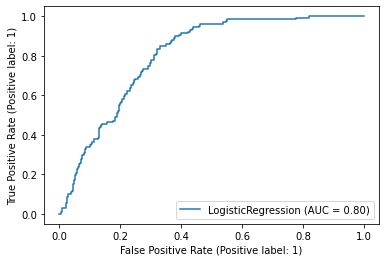

In [44]:
# Dibujamos el área bajo la curva ROC de los estimadores

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lg, X_test, y_test)
plt.show()

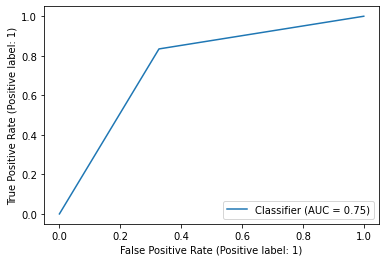

In [45]:
# Dibujamos el área bajo la curva ROC de los predictores

RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

In [46]:
# Elaboramos la matriz de confusión de los predictores

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print(matriz)

[[1471  715]
 [  21  106]]


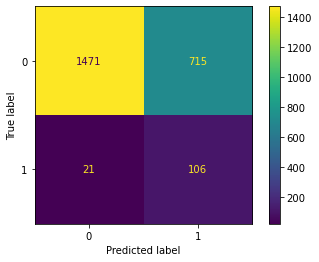

In [47]:
# Dibujamos la matriz de confusión de los predictores

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### 3.2 Selección de Características

In [38]:
# Concatenamos todo el conjunto de datos X y y

car_fraud = pd.concat([X, y], axis=1)
car_fraud.head()

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize,FraudFound_P
0,11.00,2.00,6.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,5.00,4.00,3.00,0.00,2.00,3.00,0.00,0.00,0.00,0.00,2.00,2.00,0.00,1.74,-1.36,0.76,-2.49,-1.34,-1.09,-2.18,1.25,0
1,0.00,2.00,6.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5.00,4.00,3.00,0.00,5.00,4.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.17,1.03,1.41,-0.18,1.34,-1.09,-0.46,1.30,0
2,9.00,4.00,6.00,1.00,3.00,10.00,0.00,1.00,0.00,1.00,0.00,5.00,4.00,3.00,1.00,6.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.74,-0.56,-0.33,-0.18,0.45,-1.09,0.64,1.43,0
3,5.00,5.00,17.00,0.00,4.00,6.00,0.00,1.00,1.00,2.00,0.00,1.00,4.00,3.00,1.00,7.00,7.00,1.00,0.00,0.00,3.00,0.00,0.00,0.00,-0.61,-1.36,-0.98,-0.18,-0.45,-1.09,1.69,-0.22,0
4,1.00,5.00,6.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00,0.00,5.00,4.00,3.00,1.00,6.00,5.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,-1.39,0.24,1.19,-0.18,-1.34,-1.09,-0.26,1.64,0


In [39]:
# Validamos el número de filas y columnas

car_fraud.shape

(11565, 33)

In [40]:
# Elaboramos la matriz de correlación de Pearson

correlacion = car_fraud.corr(method = 'pearson').round(2)
correlacion

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy,WeekOfMonth,WeekOfMonthClaimed,RepNumber,Deductible,DriverRating,Year,Age,ClaimSize,FraudFound_P
Month,1.00,0.00,0.01,-0.01,-0.01,0.84,0.01,0.01,0.00,0.04,0.02,-0.03,0.01,0.01,-0.02,0.02,0.02,0.05,0.00,0.01,0.03,0.00,-0.02,0.00,0.03,0.05,0.01,-0.00,0.02,0.05,-0.03,-0.02,-0.03
DayOfWeek,0.00,1.00,0.01,-0.03,-0.06,-0.00,-0.00,-0.02,0.02,0.02,0.04,-0.03,0.00,0.03,-0.04,-0.00,0.00,0.02,0.01,0.00,0.00,0.00,-0.01,0.04,-0.02,0.00,0.01,0.01,0.00,0.01,-0.01,-0.03,0.02
Make,0.01,0.01,1.00,0.01,0.01,0.01,0.02,0.02,0.01,-0.03,-0.00,-0.25,0.00,0.01,-0.04,0.07,0.06,-0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,-0.01,-0.02,-0.00,0.03,-0.00,0.00,0.00,-0.18,-0.02
AccidentArea,-0.01,-0.03,0.01,1.00,0.01,-0.00,0.03,-0.01,0.01,-0.06,-0.07,-0.01,-0.01,0.01,0.07,0.01,0.01,-0.00,-0.03,0.00,-0.02,-0.02,-0.01,-0.05,0.00,0.00,0.01,0.00,-0.00,0.00,-0.01,0.02,-0.03
DayOfWeekClaimed,-0.01,-0.06,0.01,0.01,1.00,0.00,-0.01,0.01,0.01,-0.00,0.00,-0.00,-0.01,-0.01,0.00,0.01,-0.00,-0.01,-0.00,-0.00,0.00,0.00,0.00,0.01,0.01,-0.03,0.01,0.01,-0.01,0.01,-0.00,0.01,0.01
MonthClaimed,0.84,-0.00,0.01,-0.00,0.00,1.00,0.01,0.01,-0.00,0.03,0.01,-0.05,0.00,0.01,-0.02,0.04,0.04,0.06,0.01,0.02,0.04,0.00,-0.01,-0.01,0.02,0.05,0.02,0.00,0.01,0.05,-0.02,-0.04,-0.04
Sex,0.01,-0.00,0.02,0.03,-0.01,0.01,1.00,-0.08,0.00,-0.06,-0.07,-0.12,-0.01,-0.01,-0.00,-0.11,-0.06,0.01,-0.00,-0.01,0.00,0.00,0.00,-0.07,-0.01,-0.00,-0.00,-0.02,0.01,0.00,-0.10,-0.10,-0.03
MaritalStatus,0.01,-0.02,0.02,-0.01,0.01,0.01,-0.08,1.00,0.01,0.05,0.07,-0.04,-0.01,-0.01,-0.02,0.41,0.44,-0.01,-0.01,-0.00,0.02,-0.01,0.01,0.06,-0.02,-0.00,0.00,0.04,0.01,0.02,0.41,-0.01,0.01
Fault,0.00,0.02,0.01,0.01,0.01,-0.00,0.00,0.01,1.00,0.03,0.13,-0.04,-0.03,-0.02,-0.12,0.03,0.01,0.03,0.06,0.01,0.01,-0.01,-0.01,0.20,0.02,-0.01,-0.00,-0.01,-0.01,0.02,-0.01,-0.07,-0.13
PolicyType,0.04,0.02,-0.03,-0.06,-0.00,0.03,-0.06,0.05,0.03,1.00,0.87,0.02,-0.01,-0.01,-0.14,0.03,0.02,0.03,0.01,-0.02,-0.00,0.01,-0.00,0.49,-0.01,-0.00,0.01,-0.00,0.01,0.01,0.01,-0.06,0.09


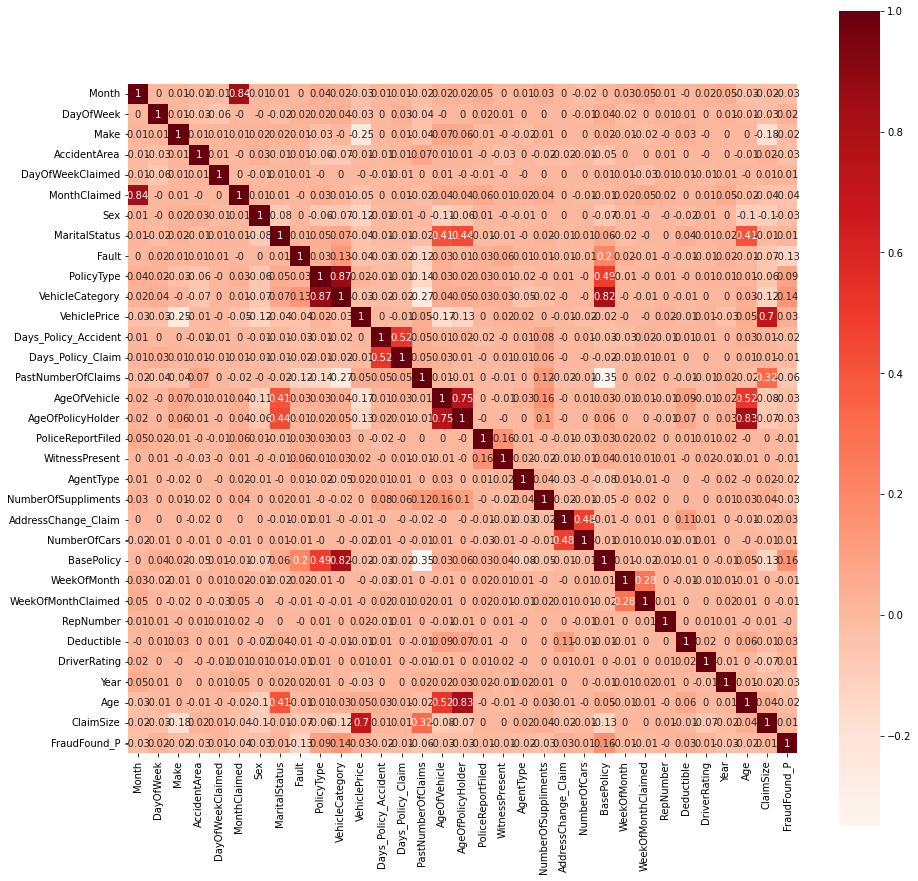

In [39]:
# Trazamos un mapa de calor para visualizar la correlación entre variables
#cmap=sns.diverging_palette(50, 500, n=500)

plt.figure(figsize = (15,15))
axis_corr = sns.heatmap(correlacion, annot=True, cmap=plt.cm.Reds, square=True)
plt.show()

In [41]:
# Seleccionamos las variables con mayor correlación > 0.75

cor_target = abs(correlacion['FraudFound_P'])
relevant_features = cor_target[cor_target>=0.09]
relevant_features

Fault             0.13
PolicyType        0.09
VehicleCategory   0.14
BasePolicy        0.16
FraudFound_P      1.00
Name: FraudFound_P, dtype: float64

In [42]:
# Eliminación Backward con p-value > 0.05

import statsmodels.api as sm

X1 = sm.add_constant(X)
model = sm.OLS(y, X1)
results = model.fit()
results.pvalues

const                  0.02
Month                  0.26
DayOfWeek              0.15
Make                   0.04
AccidentArea           0.03
DayOfWeekClaimed       0.27
MonthClaimed           0.36
Sex                    0.04
MaritalStatus          0.10
Fault                  0.00
PolicyType             0.01
VehicleCategory        0.01
VehiclePrice           0.26
Days_Policy_Accident   0.07
Days_Policy_Claim      1.00
PastNumberOfClaims     0.09
AgeOfVehicle           0.55
AgeOfPolicyHolder      0.51
PoliceReportFiled      0.18
WitnessPresent         0.43
AgentType              0.97
NumberOfSuppliments    0.10
AddressChange_Claim    0.00
NumberOfCars           0.43
BasePolicy             0.00
WeekOfMonth            0.73
WeekOfMonthClaimed     0.95
RepNumber              0.53
Deductible             0.00
DriverRating           0.43
Year                   0.03
Age                    0.10
ClaimSize              0.25
dtype: float64

In [43]:
# Eliminación Recursiva de Características RFE

from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000, class_weight='balanced')
rfe = RFE(model, n_features_to_select=10)
results = rfe.fit(X_train, y_train)

print(list(car_fraud.columns))
print(f"Features: {results.n_features_}")
print(f"Select: {results.support_}")
print(f"Ranking: {results.ranking_}")

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy', 'WeekOfMonth', 'WeekOfMonthClaimed', 'RepNumber', 'Deductible', 'DriverRating', 'Year', 'Age', 'ClaimSize', 'FraudFound_P']
Features: 10
Select: [False False False False False False  True False  True  True  True False
 False False False False False  True False  True False  True  True  True
 False False False False False False  True False]
Ranking: [14 18 22  5 23 20  1  2  1  1  1 11 12 13  7 21 17  1 19  1  6  1  1  1
 15 10  9  3  8 16  1  4]


In [47]:
# Random Forest (algoritmo ensemble)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
y_pred = forest.predict(X_test)
print(f"Error (todas las variables): {accuracy_score(y_test, y_pred)}")

Error (todas las variables): 0.9399048854301773


In [48]:
# Ordenamos las variables de menor a mayor

ranking = np.argsort(forest.feature_importances_)
print(car_fraud.columns.values[ranking])

['Days_Policy_Accident' 'WitnessPresent' 'Days_Policy_Claim' 'AgentType'
 'PoliceReportFiled' 'NumberOfCars' 'Deductible' 'AddressChange_Claim'
 'AccidentArea' 'Make' 'DayOfWeek' 'VehiclePrice' 'Age'
 'NumberOfSuppliments' 'RepNumber' 'MaritalStatus' 'Month' 'ClaimSize'
 'DayOfWeekClaimed' 'AgeOfPolicyHolder' 'MonthClaimed' 'Year'
 'WeekOfMonthClaimed' 'Sex' 'WeekOfMonth' 'DriverRating' 'AgeOfVehicle'
 'VehicleCategory' 'PastNumberOfClaims' 'PolicyType' 'BasePolicy' 'Fault']


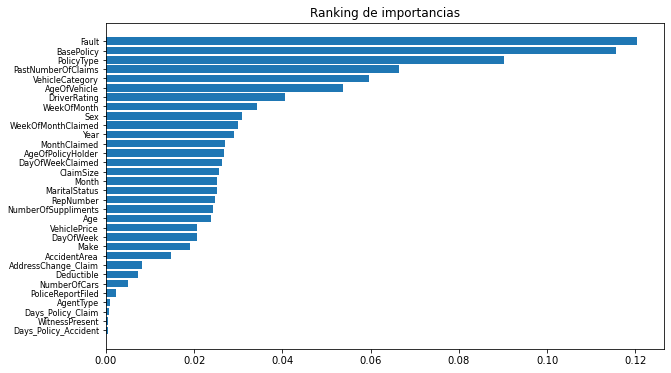

In [49]:
# Graficamos las variables de mayor a menor

plt.figure(figsize=(10,6))
plt.title("Ranking de importancias")
plt.barh(range(X_test.shape[1]), importances[ranking])
plt.yticks(range(X_test.shape[1]), car_fraud.columns.values[ranking], fontsize=8)
plt.show()

In [48]:
# Eliminamos las características menos importantes

forest.fit(X_train[ : , ranking[-5: ]], y_train)
y_pred = forest.predict(X_test[ : , ranking[-5: ]])
print(f"Error(sin las últimas características): {accuracy_score(y_test, y_pred)}")

InvalidIndexError: (slice(None, None, None), array([10, 14,  9,  8, 23], dtype=int64))

### 3.3 Reducción de la Dimensionalidad

In [54]:
# Reducción de dimensiones aplicando PCA

from sklearn.decomposition import PCA

k = 15
pca = PCA(n_components=k)
X_train_pc = pca.fit_transform(X_train)
print(f"Explained Variance: {pca.explained_variance_ratio_}")
print(f"Sum Explained Variance: {pca.explained_variance_ratio_.sum()}")
#print(f"Components: {pca.components_}")
X_train_pc = pd.DataFrame(data=X_train_pc,
                 columns=['PC1',
                          'PC2',
                          'PC3',
                          'PC4',
                          'PC5',
                          'PC6',
                          'PC7',
                          'PC8',
                          'PC9',
                          'PC10',
                          'PC11',
                          'PC12',
                          'PC13',
                          'PC14',
                          'PC15'])

Explained Variance: [0.39215822 0.26440636 0.05582044 0.04869404 0.03045255 0.02762513
 0.02433433 0.02036816 0.01717346 0.01490399 0.01425026 0.01204992
 0.01163835 0.01126915 0.01045308]
Sum Explained Variance: 0.9555974513645036


In [55]:
X_train_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-8.11,1.77,0.63,-3.27,2.92,0.64,-1.73,1.15,0.07,-0.17,-1.23,-1.42,-0.71,0.66,-1.19
1,-8.49,4.63,0.72,1.45,0.85,0.01,-1.15,-0.76,1.93,0.61,-0.26,1.71,0.37,-0.71,-0.37
2,-7.40,2.61,2.75,-1.87,0.20,-1.44,2.26,1.06,0.20,-0.36,-0.36,0.29,1.34,0.89,0.74
3,0.14,4.75,-0.53,-1.32,-1.18,-1.63,2.86,-1.20,-2.18,-0.78,-0.24,-1.36,1.20,0.08,0.48
4,4.34,-6.23,1.29,1.61,-2.68,-0.82,0.18,-0.45,0.79,0.11,0.03,0.17,1.31,0.78,-1.12


In [56]:
X_train_pc.shape

(17388, 15)

In [58]:
# Reducción de dimensiones aplicando PCA

from sklearn.decomposition import PCA

k = 15
pca = PCA(n_components=k)
X_test_pc = pca.fit_transform(X_test)
print(f"Explained Variance: {pca.explained_variance_ratio_}")
print(f"Sum Explained Variance: {pca.explained_variance_ratio_.sum()}")
#print(f"Components: {pca.components_}")
X_test_pc = pd.DataFrame(data=X_test_pc,
                 columns=['PC1',
                          'PC2',
                          'PC3',
                          'PC4',
                          'PC5',
                          'PC6',
                          'PC7',
                          'PC8',
                          'PC9',
                          'PC10',
                          'PC11',
                          'PC12',
                          'PC13',
                          'PC14',
                          'PC15'])

Explained Variance: [0.35154705 0.28823736 0.05683895 0.05058737 0.0324802  0.02727243
 0.02397605 0.0205874  0.018961   0.01600558 0.01371995 0.01350407
 0.01281751 0.01191275 0.01147391]
Sum Explained Variance: 0.9499215791036072


In [88]:
# Reducción de dimensiones aplicando PCA

from sklearn.decomposition import PCA

k = 15
pca = PCA(n_components=k)
X_pc = pca.fit_transform(X)
print(f"Explained Variance: {pca.explained_variance_ratio_}")
print(f"Sum Explained Variance: {pca.explained_variance_ratio_.sum()}")
#print(f"Components: {pca.components_}")
X_pc = pd.DataFrame(data=X_pc,
                 columns=['PC1',
                          'PC2',
                          'PC3',
                          'PC4',
                          'PC5',
                          'PC6',
                          'PC7',
                          'PC8',
                          'PC9',
                          'PC10',
                          'PC11',
                          'PC12',
                          'PC13',
                          'PC14',
                          'PC15'])

Explained Variance: [0.38730943 0.267268   0.05533077 0.04961496 0.03088184 0.02944191
 0.02478044 0.02042599 0.01680698 0.01439197 0.01369967 0.01181736
 0.01146107 0.01123583 0.01086186]
Sum Explained Variance: 0.9553280751115744


In [51]:
# Calculamos el Accuracy utilizando Cross Validation KFold (regresión) de todo el conjunto de datos X y y
#, class_weight='balanced'

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, shuffle=False)
lg = LogisticRegression(max_iter=1000)
scores = 'accuracy'
resultados = cross_val_score(lg, X_pc, y, cv=kf, scoring=scores)
print(f"Accuracy: {resultados.mean()*100.0:,.2f}%")

Accuracy: 94.08%


In [52]:
# Calculamos el Accuracy utilizando Cross Validation StratifiedKFold (clasificación) de todo el conjunto de datos X y y
#, class_weight='balanced'

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=False)
lgcv = LogisticRegression(max_iter=1000)
scores = 'accuracy'
resultados = cross_val_score(lgcv, X_pc, y, cv=skf, scoring=scores)
print(f"Accuracy: {resultados.mean()*100.0:,.2f}%")

Accuracy: 94.07%


## 4. Modelado

### 4.1 Taxonomía Lineal

In [69]:
# Calculamos el Accuracy utilizando Cross Validation KFold (regresión) de todo el conjunto de datos X y y
#, class_weight='balanced'

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=5, shuffle=False)
lg = LogisticRegression(max_iter=1000, class_weight='balanced')
scores = cross_val_score(lg, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {resultados.mean()*100.0:,.2f}%")

lg.fit(X_train_pc, y_train)
y_pred = lg.predict(X_test_pc)

Accuracy: 94.07%


In [70]:
# Obtenemos el reporte de clasificación de los predictores

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.60      0.73      2186
           1       0.06      0.46      0.11       127

    accuracy                           0.59      2313
   macro avg       0.51      0.53      0.42      2313
weighted avg       0.90      0.59      0.70      2313



In [71]:
# Elaboramos la matriz de confusión de los predictores

from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print(matriz)

[[1305  881]
 [  68   59]]


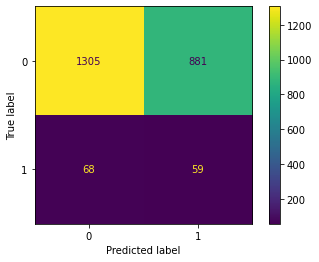

In [72]:
# Dibujamos la matriz de confusión de los predictores

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

### 4.2 Taxonomía No Lineal

In [84]:
# K vecinos más cercanos (KNN)

from sklearn.neighbors import KNeighborsClassifier

kf = KFold(n_splits=10, shuffle=False)
knc = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
scores = cross_val_score(knc, X_pc, y, cv=kf, scoring='recall')
print(f"Accuracy: {scores.mean()*100.0:,.2f}%")

knc.fit(X_train_pc, y_train)
y_pred = knc.predict(X_test_pc)

TypeError: __init__() got an unexpected keyword argument 'class_weight'

In [83]:
# Obtenemos el reporte de clasificación de los predictores

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.61      0.74      2186
           1       0.06      0.44      0.11       127

    accuracy                           0.60      2313
   macro avg       0.51      0.53      0.43      2313
weighted avg       0.90      0.60      0.71      2313



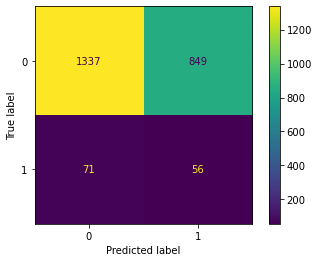

In [79]:
# Dibujamos la matriz de confusión de los predictores

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [99]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=10, shuffle=False)
gnb = GaussianNB()
scores = cross_val_score(gnb, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}%")

lg.fit(X_train_pc, y_train)
y_pred = lg.predict(X_test_pc)

Accuracy: 59.34%


In [91]:
# Árboles de Decisión (CART)

from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=10, shuffle=False)
dtc = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(dtc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}%")

Accuracy: 83.13%


In [54]:
# Máquina de Soporte Vectorial (SVM)

from sklearn.svm import SVC

kf = KFold(n_splits=10, shuffle=False)
svc = SVC()
scores = cross_val_score(svc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}%")

Accuracy: 94.08%


### 4.3 Evaluación de modelos

In [56]:
# Obtenemos la media y la desviación estandar del Accuracy por cada uno de los modelos

models = []
models.append(('LoR', LogisticRegression(max_iter=1000)))
models.append(('k-NN', KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(criterion='entropy')))
models.append(('SVM', SVC()))

scores = []
names = []
for name, model in models:
    kf = KFold(n_splits=10, shuffle=False)
    cvs = cross_val_score(model, X_pc, y, cv=kf, scoring='accuracy')
    scores.append(name)
    print(f"{name}: {cvs.mean()*100.0:,.2f}% ({cvs.std()*100.0:,.2f}%)")

LoR: 94.08% (0.81%)
k-NN: 93.71% (0.95%)
NB: 91.83% (1.47%)
CART: 88.58% (1.40%)
SVM: 94.08% (0.81%)


NameError: name 'names' is not defined

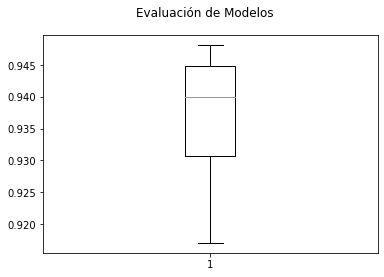

In [80]:
# Graficamos la media y la desviación estandar del Accuracy por cada uno de los modelos

fig = plt.figure()
fig.suptitle("Evaluación de Modelos")
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()

In [70]:
plt.figure(figsize=(8,6))
sns.boxplot(x=names, y=scores)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\categorical.py:250: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


KeyError: 'LoR'

<Figure size 576x432 with 0 Axes>

### 4.4 Ensamble Bagging

In [90]:
# Bagged Decision Trees

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
trees = 10
kf = KFold(n_splits=5, shuffle=False)
dtc = DecisionTreeClassifier(criterion='entropy')
bc = BaggingClassifier(base_estimator=dtc, n_estimators=trees, random_state=seed)
scores = cross_val_score(bc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 77.04% (12.78%)


In [92]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

seed = 7
trees = 10
features = 3
kf = KFold(n_splits=5, shuffle=False)
rfc = RandomForestClassifier(n_estimators=trees, max_features=features, random_state=seed)
scores = cross_val_score(rfc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 78.89% (9.19%)


In [93]:
# Extra Trees

from sklearn.ensemble import ExtraTreesClassifier

seed = 7
trees = 10
features = 3
kf = KFold(n_splits=5, shuffle=False)
et = ExtraTreesClassifier(n_estimators=trees, max_features=features, random_state=seed)
scores = cross_val_score(et, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 84.11% (7.63%)


### 4.5 Ensamble Boosting

In [96]:
# AdaBoost

from sklearn.ensemble import AdaBoostClassifier

seed = 7
trees = 10
kf = KFold(n_splits=5, shuffle=False)
ab = AdaBoostClassifier(n_estimators=trees, random_state=seed)
scores = cross_val_score(ab, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 51.11% (9.91%)


In [97]:
# Gradient Boosting Machine (GBM)

from sklearn.ensemble import GradientBoostingClassifier

seed = 7
trees = 10
kf = KFold(n_splits=5, shuffle=False)
gbc = GradientBoostingClassifier(n_estimators=trees, random_state=seed)
scores = cross_val_score(gbc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 26.56% (21.24%)


In [101]:
# Voting

from sklearn.ensemble import VotingClassifier

kf = KFold(n_splits=5, shuffle=False)

lg = LogisticRegression(max_iter=1000)
knc = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
gnb = GaussianNB()

vc = VotingClassifier([('clf1', lg), ('clf2', knc), ('clf3', gnb)], voting='soft')


scores = cross_val_score(vc, X_pc, y, cv=kf, scoring='accuracy')
print(f"Accuracy: {scores.mean()*100.0:,.2f}% ({scores.std()*100.0:,.2f}%)")

Accuracy: 67.31% (23.31%)
